In [1]:
!unzip data02.zip

Archive:  data02.zip
  inflating: train.csv               
  inflating: submission_sample.csv   
  inflating: test.csv                


## 데이터 전처리
- 대부분 Nan인 데이터 제거
- 상관계수로 보았을 때 상관계수가 작은 값인  ssg, receivableL1, receivableL2 데이터를 삭제 
- employee1	employee2 는 상관계수가 높다. 또한 두개의 값은 Nan 값이 많이 차지한다. 
<br>따라서 둘 중 값이 Nan이 아니라면 둘의 값을 같게 해준다.
- 결측값 채우기 --> SimpleImputer most_frequent 사용
- LabelEncoder 사용 --> 문자로 입력된 값을 정수로 변경
- test 값의 , 제거
- 차원 축소 (PCA(n_components= 30))
- StandardScaler

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

train = pd.read_csv("train.csv")
#대부분 Nan인 데이터 제거
drop_index = train[train.isnull().sum(1) > 40].index
train= train.drop(drop_index)

##상관계수
: 공분산을 각각의 표준 편차로 나누어준 값
측정단위와 상관없이 두 변수 간의 연관성, <br>직선적인 경향을 나타내준다.

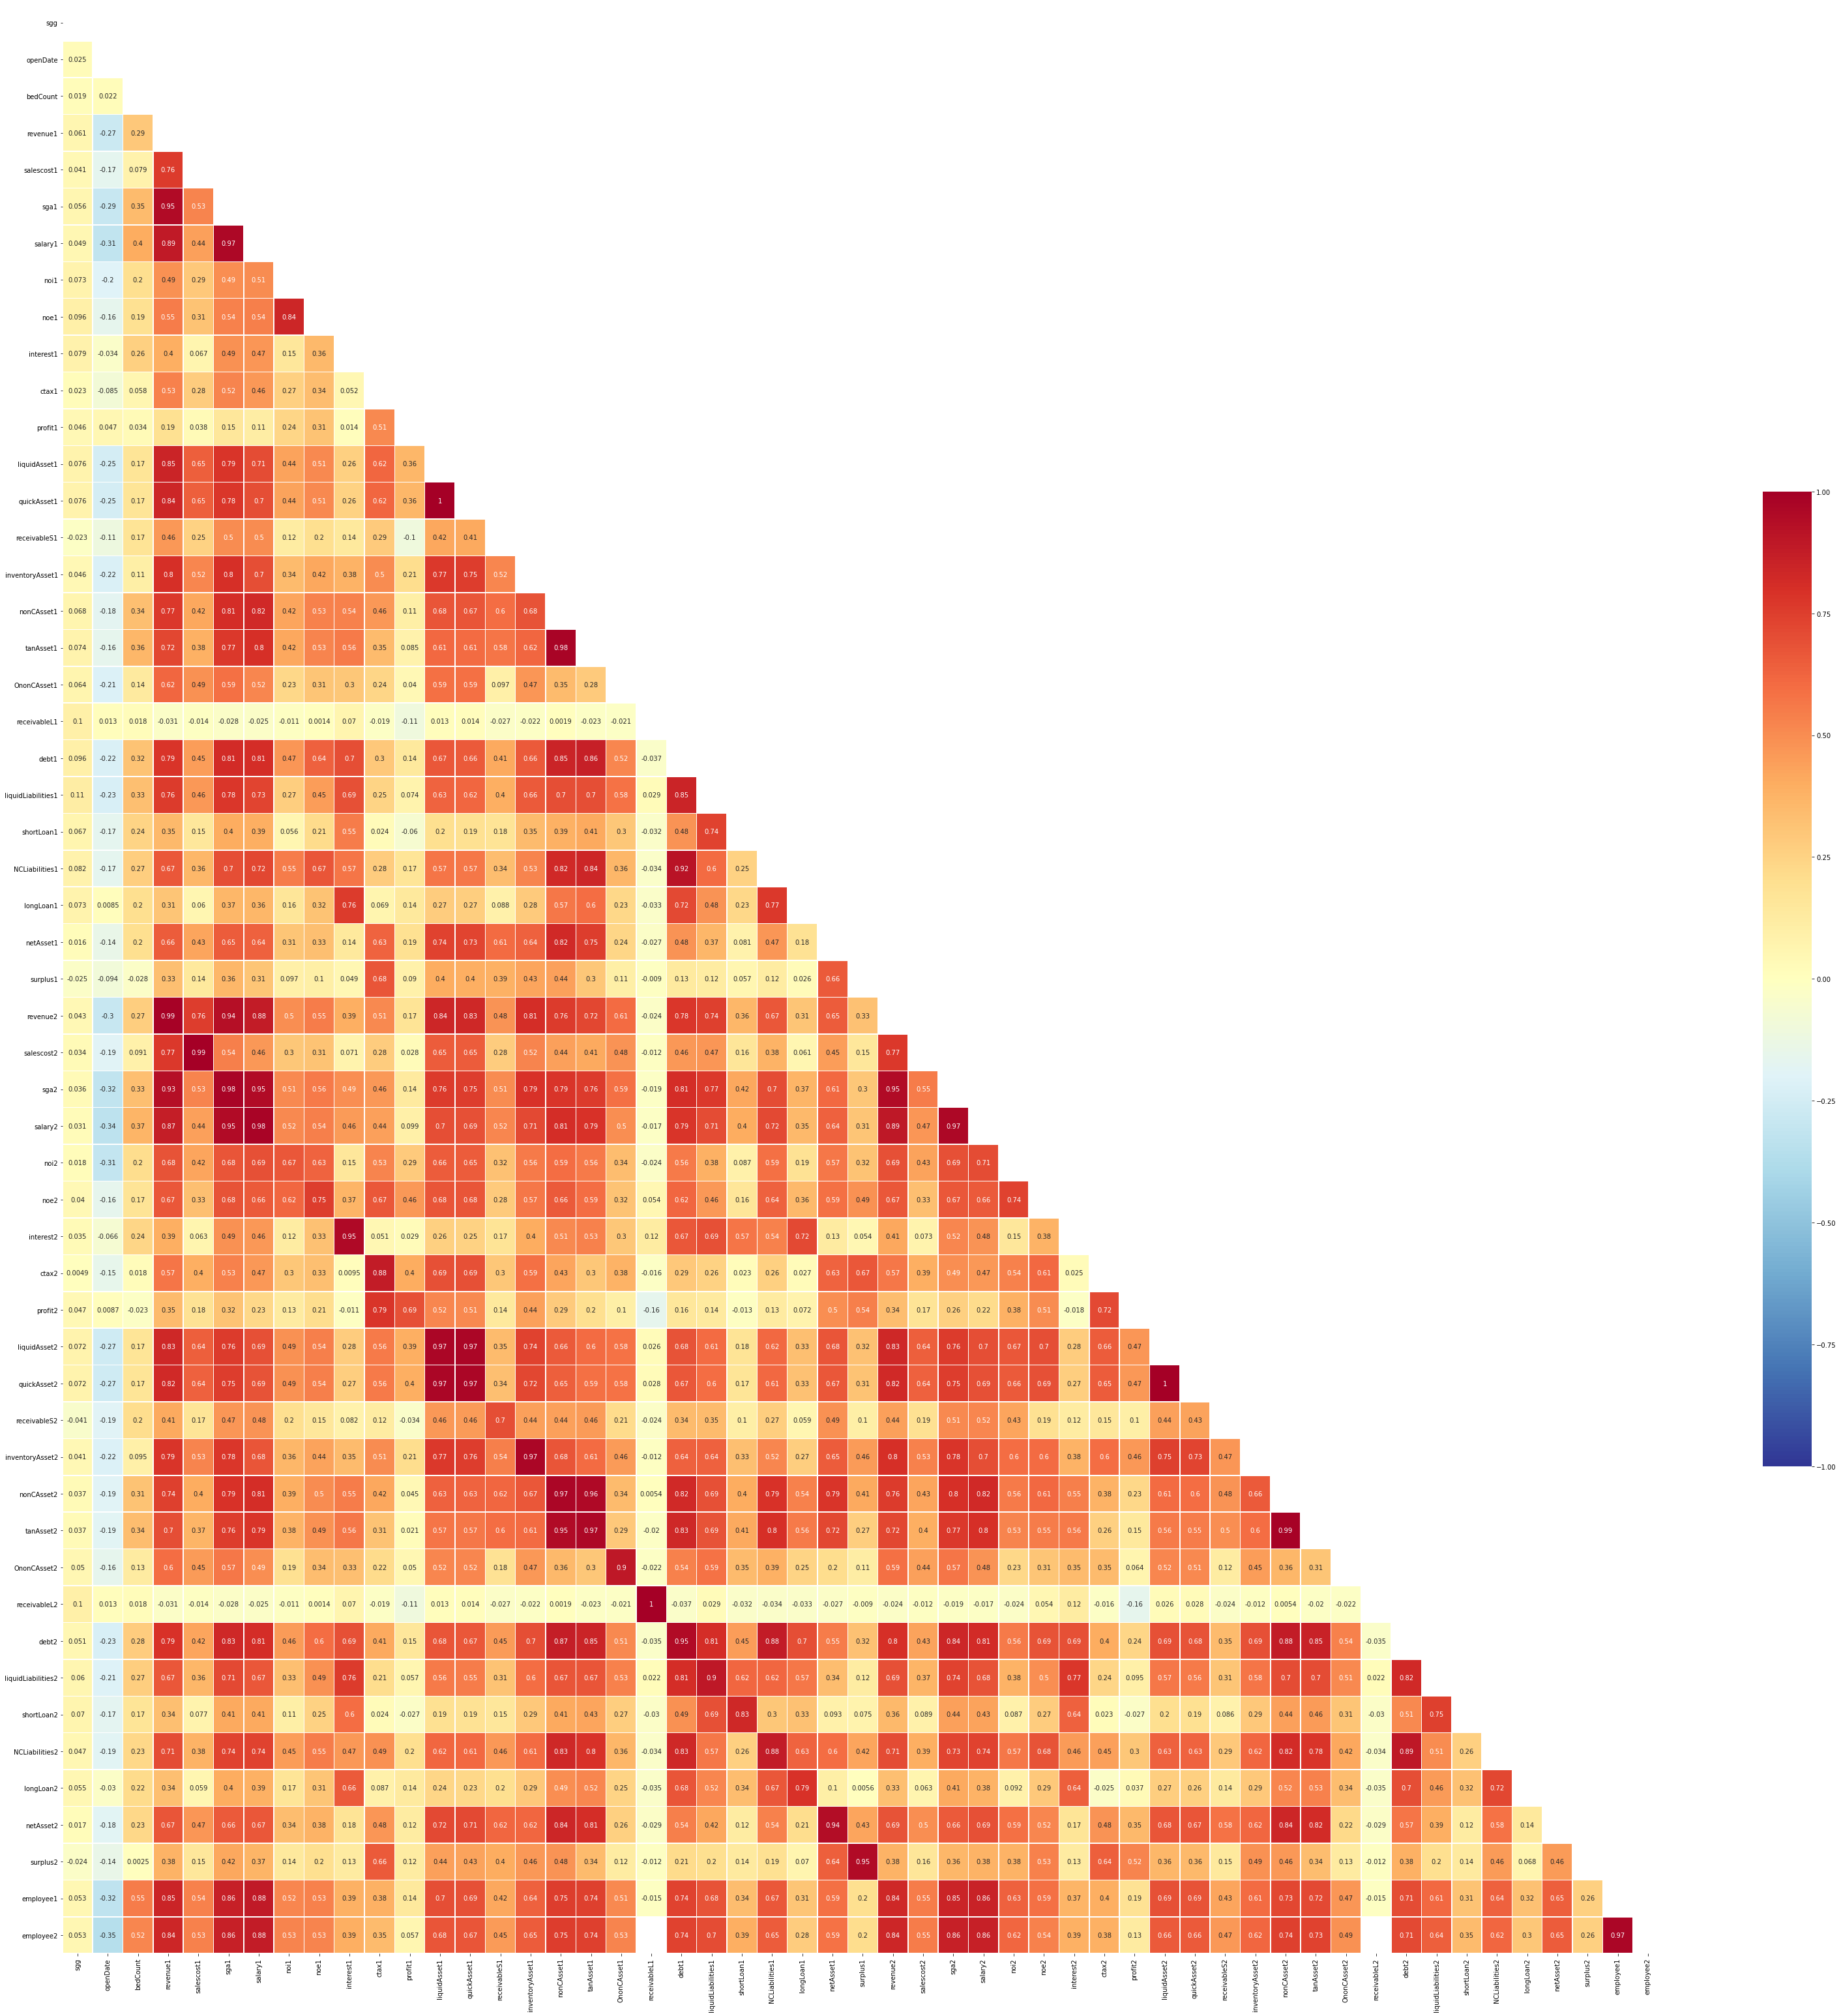

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_x = train.loc[:, "sido": "ownerChange"]
df = train_x.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(55,55) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

del train_x["sgg"] #병원의 시군구 자료
del train_x["receivableL1"] #장기미수금, 2017(회계년도)년 데이터를 의미함
del train_x["receivableL2"] #장기미수금, 2016(회계년도)년 데이터를 의미함

In [ ]:
# employee1	employee2 열 중 둘중 하나가 Nan 값이라면 같은 값으로 채워준다.

import math
x = float('nan')

nan_index = train_x[train_x.isnull().sum(1) > 0].index
nan_df = train_x.loc[nan_index, :]
for i in nan_index:
  if math.isnan(train_x.loc[i, "employee1"]) and  not math.isnan(train_x.loc[i, "employee2"]):
    print(train_x.loc[i, "employee1"])
    train_x.loc[i, "employee1"] = train_x.loc[i, "employee2"]
  elif math.isnan(train_x.loc[i, "employee2"]) and  not math.isnan(train_x.loc[i, "employee1"]):
    train_x.loc[i, "employee2"] = train_x.loc[i, "employee1"]
nan_df = train_x.loc[nan_index, :]
nan_df

nan


,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
35,gyeonggi,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,9.366451e+08,59924069.0,4.287212e+08,284069476.0,0.0,1.181879e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.093132e+09,1.428541e+08,1.751390e+09,9.164822e+08,21947086.0,1.472983e+08,113100675.0,0.0,7.353718e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,51.0,51.0,change
48,seoul,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.000000e+00,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.000000e+00,NaN,NaN,NaN
62,busan,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,5.644636e+08,7534205.0,5.263060e+07,52630597.0,0.0,-3.801011e+08,6.073662e+08,5.953914e+08,1.015000e+06,11974763.0,3.629704e+09,3.629704e+09,0.0,3.513950e+09,3.342069e+09,2.918153e+09,1.718817e+08,1.718817e+08,7.231197e+08,7.231197e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,38.0,38.0,NaN
71,jeonbuk,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,2.198043e+09,56630198.0,2.281945e+08,113598011.0,22221340.0,2.653634e+08,1.970952e+09,1.963787e+09,0.000000e+00,7165400.0,3.553691e+09,2.749986e+09,527179060.0,2.803885e+09,2.793826e+09,2.590000e+09,1.005862e+07,0.000000e+00,2.720758e+09,0.000000e+00,3.318141e+09,1.443104e+08,2.982098e+09,1.709276e+09,58244152.0,1.645103e+08,91316429.0,13350570.0,7.211579e+07,1.694659e+09,1.686307e+09,0.000000e+00,8351300.0,3.451466e+09,2.778451e+09,410506320.0,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.0,same
93,gyeongbuk,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.000000e+00,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.000000e+00,NaN,NaN,NaN
193,gyeonggi,20121213,NaN,NaN,3.054388e+08,2.241614e+07,4.674753e+08,2.548688e+08,13451554.0,9.012973e+07,4239523.0,0.0,-2.611308e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.342966e+08,6.435569e+07,8.693647e+08,6.757184e+08,1333.0,2.431707e+07,5929772.0,0.0,-4.23739

In [ ]:
#결측값 채우기
imp_most_frequent = SimpleImputer(missing_values= np.nan , strategy='most_frequent')
train_x_imp = imp_most_frequent.fit_transform(train_x)
train_imp_df = pd.DataFrame(train_x_imp, columns=train_x.columns)


train_imp_df

,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,choongnam,20071228,175,nursing_hospital,4.21753e+09,0,3.96113e+09,2.03384e+09,1.56524e+07,1.52362e+07,1.32362e+07,3.16418e+07,2.2517e+08,1.0127e+09,9.97672e+08,4.70056e+08,1.50278e+07,2.51459e+09,2.36068e+09,1.4345e+08,6.82826e+08,2.01324e+08,0,4.81502e+08,3.51e+08,2.84446e+09,1.49639e+09,4.29785e+09,0,4.05742e+09,2.06379e+09,1.61947e+07,2.99834e+07,1.5683e+07,1.88081e+07,2.0783e+08,8.30169e+08,8.1657e+08,5.23703e+08,1.3599e+07,2.54811e+09,2.38626e+09,1.45899e+08,7.58994e+08,2.22877e+08,0,5.36117e+08,3.9e+08,2.61929e+09,1.27122e+09,62,64,same
1,gyeonggi,20161228,468,nursing_hospital,1.00452e+09,5.15484e+08,4.4722e+08,2.96402e+08,76156,30000,0,0,4.18648e+07,2.72442e+08,2.53682e+08,8.09595e+06,1.876e+07,1.20481e+08,1.20481e+08,0,9.24143e+07,9.24143e+07,0,0,0,3.00509e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,234,1,same
2,incheon,20000814,353,general_hospital,7.25073e+10,0,7.06774e+10,3.1786e+10,5.06223e+08,1.25957e+09,1.19688e+09,1.7377e+08,9.0283e+08,1.30415e+10,1.15347e+10,0,1.50679e+09,4.31794e+10,3.83208e+10,3.94521e+09,4.23638e+10,2.79919e+10,1.98852e+10,1.43719e+10,7.25304e+09,1.38571e+10,8.64366e+09,6.68583e+10,0,6.49242e+10,2.97113e+10,4.76808e+08,1.35367e+09,1.27742e+09,2.18892e+08,8.38387e+08,1.11257e+10,9.89054e+09,0,1.23518e+09,3.95836e+10,3.48558e+10,3.91591e+09,3.7755e+10,1.70186e+10,9.21943e+09,2.07364e+10,1.51e+10,1.29543e+10,7.74083e+09,663,663,same
3,gyeongnam,20050901,196,general_hospital,4.90435e+10,0,4.76561e+10,2.44608e+10,1.12352e+08,1.41909e+09,1.30725e+09,0,8.07497e+07,6.31708e+09,5.87327e+09,4.09932e+09,4.43819e+08,4.36673e+10,4.33061e+10,2.2234e+08,4.98981e+10,2.89092e+10,1.79304e+10,2.09889e+10,1.35e+10,8.63116e+07,9.02555e+09,4.80828e+10,0,4.71258e+10,2.346e+10,5.97748e+08,1.52211e+09,1.34985e+09,0,3.26426e+07,4.90678e+09,4.46402e+09,3.36523e+09,4.42759e+08,4.65314e+10,4.56294e+10,7.89341e+08,5.14326e+10,3.00726e+10,1.75938e+10,2.136e+10,1.4108e+10,5.56194e+06,9.02555e+09,206,197,same
4,gyeongnam,20020501,243,general_hospital,3.35805e+10,9.223e+09,2.37279e+10,1.66553e+10,6.54143e+07,7.41269e+08,3.36462e+08,0,-4.62274e+07,5.6351e+09,5.48168e+09,6.63482e+08,1.53425e+08,1.86497e+10,1.84994e+10,1.36458e+08,0,1.84994e+10,1.71805e+10,0,0,0,3.66492e+09,3.43344e+10,9.83914e+09,2.40962e+10,1.63879e+10,1.25681e+08,4.50083e+08,4.1551e+08,0,7.4686e+07,4.86942e+09,4.72586e+09,1.97616e+08,1.43562e+08,2.21271e+10,2.18611e+10,1.91046e+08,0,2.18611e+10,1.70871e+10,2e+07,0,0,5.879e+09,397,390,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,jeonnam,20050211,214,nursing_hospital,7.6147e+09,4.15347e+08,5.90312e+09,3.46786e+09,4.2099e+07,7.43942e+08,1.87576e+08,0,5.94387e+08,2.7766e+09,2.76952e+09,1.79712e+09,7.08639e+06,1.19127e+10,1.17187e+10,1.19857e+08,8.71537e+09,1.52e+09,0,7.19537e+09,5.93e+09,5.97389e+09,1.40603e+09,7.06882e+09,4.05785e+08,6.75515e+09,3.76895e+09,9.03182e+07,2.09008e+08,1.9666e+08,5.16086e+07,-2.62415e+08,2.55056e+09,2.54234e+09,1.96269e+09,8.2257e+06,1.22527e+10,1.21047e+10,7.68567e+07,9.42377e+09,2.6182e+09,0,6.80557e+09,5.93e+09,5.3795e+09,8.11642e+08,193,141,same
289,choongnam,20140618,0,hospital,6.71714e+09,8.2e+09,0,0,186359,1.39851e+08,1.29698e+08,0,-1.62252e+09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79,79,same
290,gyeongbuk,19830705,0,hospital,0,0,5

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imp_most_frequent = SimpleImputer(missing_values= np.nan , strategy='most_frequent')

test = pd.read_csv("test.csv")
test_x = test.loc[:, "sido": "ownerChange"]
del test_x["sgg"] #병원의 시군구 자료
del test_x["receivableL1"] #장기미수금, 2017(회계년도)년 데이터를 의미함
del test_x["receivableL2"] #장기미수금, 2016(회계년도)년 데이터를 의미함



In [ ]:
nan_index = test_x[test_x.isnull().sum(1) > 0].index
print(nan_index)

nan_index = [20,  82,  83,  99, 104, 112, 113, 122 ]
for i in nan_index:
    test_x.loc[i, "employee2"] = test_x.loc[i, "employee1"]

nan_df = test_x.loc[nan_index, :]
nan_df

Int64Index([  2,  10,  13,  15,  20,  22,  40,  52,  56,  78,  82,  83,  84,
             88,  93,  99, 104, 112, 113, 120, 122, 123, 124, 125, 126],
           dtype='int64')


,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
20,daegu,19970228.0,154.0,hospital,1.351696e+10,2.469251e+09,1.072392e+10,6.759008e+09,27333859.0,1.902601e+08,185648368.0,0.0,1.608576e+08,2.127028e+09,2.010007e+09,1.321744e+09,117020894.0,1.729681e+10,1.719271e+10,91058000.0,9.176202e+09,9.176202e+09,6.149040e+09,0.000000e+00,0.000000e+00,1.024764e+10,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,150,150,NaN
82,jeonnam,19880801.0,191.0,general_hospital,1.010181e+10,1.776295e+09,8.380210e+09,5.336222e+09,151833893.0,8.587896e+07,51307456.0,0.0,1.126055e+07,8.207361e+08,6.580047e+08,6.171862e+08,162731330.0,8.403699e+09,8.304178e+09,99521298.0,2.927023e+09,1.169385e+09,1.683991e+08,1.757637e+09,1.657637e+09,6.297413e+09,9530310.0,4.037813e+09,867763748.0,3.180943e+09,2.135182e+09,27962463.0,4.369865e+07,20833653.0,0.0,-2.662972e+07,9.907260e+08,8.284294e+08,7.191250e+08,162281948.0,8.562470e+09,8.529296e+09,33173766.0,2.955340e+09,1.137546e+09,332417093.0,1.817795e+09,1.717795e+09,6.597855e+09,9530310.0,116,116,NaN
83,choongbuk,20150124.0,60.0,hospital,2.326750e+09,3.999708e+08,3.083860e+09,1.370629e+09,3559844.0,2.795954e+08,228185308.0,4450440.0,-1.437567e+09,1.320625e+09,1.277669e+09,3.149222e+08,42955501.0,9.535550e+09,9.533550e+09,2000000.0,6.676344e+09,1.027133e+09,1.255931e+08,5.649211e+09,4.193665e+09,4.179831e+09,0.0,4.031251e+08,0.0,3.440578e+08,1.863462e+08,1548.0,2.223871e+07,22238708.0,0.0,3.683015e+07,2.805749e+08,2.335749e+08,2.080686e+08,47000000.0,8.917909e+09,8.917909e+09,0.0,3.581086e+09,4.810858e+08,117947275.0,3.100000e+09,3.100000e+09,5.617398e+09,0.0,37,37,NaN
99,busan,20100226.0,NaN,nursing_hospital,3.944159e+07,1.835644e+06,1.139939e+08,5.485254e+07,3240000.0,1.465444e+08,12726531.0,8433480.0,-2.281258e+08,4.402735e+07,4.402735e+07,3.701850e+07,0.0,3.720335e+09,3.720335e+09,0.0,2.029206e+09,1.442064e+08,0.000000e+00,1.890000e+09,1.890000e+09,1.735156e+09,0.0,2.284415e+09,652246618.0,1.727134e+09,1.037262e+09,5707843.0,6.851819e+07,67216051.0,9773610.0,-1.675497e+08,1.066230e+08,9.655248e+07,4.581687e+07,1637000.0,3.869997e+09,3.858041e+09,11956000.0,2.013338e+09,1.283379e+08,0.0,1.890000e+09,1.890000e+09,1.963282e+09,0.0,32,32,NaN
104,gyeongbuk,20120618.0,142.0,nursing_hospital,8.724619e+08,0.000000e+00,7.972936e+08,3.797920e+08,11506491.0,1.650671e+07,15990706.0,0.0,7.016803e+07,1.665423e+09,1.665423e+09,0.000000e+00,0.0,4.569689e+09,4.524689e+09,30000000.0,2.606701e+09,3.287006e+08,0.000000e+00,2.280000e+09,2.280000e+09,3.628412e+09,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,61,61,NaN
112,jeonbuk,20161229.0,156.0,nursing_hospital,1.061103e+07,0.000000e+00,8.800000e+03,0.000000e+00,0.0,0.000000e+00,0.0,0.0,1.060223e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,36,36,NaN
113,jeonbuk,20161229.0,156.0,nursing_hospital,1.061103e+07,

In [ ]:
test_imp = imp_most_frequent.fit_transform(test_x)
test_imp_df = pd.DataFrame(test_imp, columns=test_x.columns)

test_imp_df

,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,incheon,1.99811e+07,300,general_hospital,6.68249e+10,0,6.56571e+10,3.2237e+10,4.31409e+09,4.90152e+09,1.77587e+09,7.668e+07,5.03669e+08,2.59138e+10,2.43874e+10,7.24258e+08,1.52643e+09,4.80728e+10,4.62993e+10,7.46312e+08,6.76909e+10,5.42609e+10,3.80593e+10,1.343e+10,6.3191e+09,6.29577e+09,8.94459e+09,6.36038e+10,0,6.26113e+10,3.01695e+10,4.07645e+09,4.33236e+09,1.57863e+09,2.184e+08,5.18182e+08,2.49899e+10,2.36793e+10,1.23775e+09,1.31064e+09,4.65019e+10,4.3563e+10,7.96386e+08,5.54064e+10,5.06844e+10,3.71433e+10,4.72e+09,4.69e+09,1.60854e+10,8.94459e+09,693,693,same
1,jeju,2.01603e+07,44,hospital,3.49576e+10,0,3.25927e+10,1.67225e+10,6.87102e+07,1.98103e+09,1.93645e+09,0,4.52556e+08,5.86173e+09,5.3722e+09,6.61029e+08,4.89529e+08,7.51101e+10,6.67865e+10,4.5e+06,6.62674e+10,4.21095e+10,2.33e+10,2.41579e+10,1.72e+10,1.47045e+10,1.04628e+10,3.75425e+10,0,3.86852e+10,1.89773e+10,1.91802e+08,3.69437e+09,2.01611e+09,0,-4.64527e+09,5.50372e+09,4.94337e+09,1.54431e+08,5.60352e+08,6.55938e+10,6.5453e+10,1.45e+07,6.73084e+10,4.20983e+10,2.42e+10,2.52101e+10,1.83e+10,3.78913e+09,0,379,371,same
2,jeonnam,1.98904e+07,276,general_hospital,2.32603e+10,2.54257e+09,2.30875e+10,1.16873e+10,1.60194e+09,1.38094e+09,8.1012e+08,0,-2.14875e+09,1.26531e+10,1.13392e+10,7.33711e+09,1.31391e+09,2.94547e+10,2.83063e+10,1.38807e+08,0,2.83063e+10,2.18228e+10,0,0,0,1.63854e+10,2.46803e+10,1.5001e+09,2.37395e+10,1.19115e+10,2.36122e+08,1.32886e+09,6.25923e+08,1.52103e+07,-1.6672e+09,1.3542e+10,1.26385e+10,7.0037e+09,9.03504e+08,2.93881e+10,2.77759e+10,4.28851e+08,0,2.77759e+10,2.18228e+10,0,0,0,1.63854e+10,130,42,same
3,busan,2.01002e+07,363,general_hospital,0,0,0,0,4.85065e+09,2.06099e+09,0,0,2.78966e+09,8.64453e+09,7.89134e+09,0,7.53194e+08,6.73026e+10,6.4153e+10,0,2.89188e+10,2.60419e+10,1.87519e+10,2.87688e+09,0,4.70284e+10,0,0,0,0,0,4.97553e+09,2.11274e+09,0,0,2.86279e+09,1.2049e+10,1.12648e+10,0,7.84155e+08,3.9209e+10,3.60194e+10,0,1.21152e+10,9.55624e+09,4.25187e+09,2.55893e+09,0,3.91428e+10,0,760,760,same
4,jeonbuk,2.00406e+07,213,general_hospital,5.03702e+10,0,4.8558e+10,2.29635e+10,1.53445e+09,0,2.5738e+09,0,3.34667e+09,7.84977e+09,7.13833e+09,1.104e+08,7.11445e+08,6.40485e+10,6.0243e+10,3.58202e+09,4.92164e+10,2.50335e+10,1.72022e+10,2.41828e+10,9.97642e+09,2.26819e+10,1.49269e+10,4.349e+10,0,4.06781e+10,1.87162e+10,1.8022e+09,0,3.92528e+09,0,4.61406e+09,8.84772e+09,7.86878e+09,1.764e+08,9.78941e+08,6.08569e+10,6.01411e+10,5.46749e+08,4.39597e+10,7.53557e+09,3.29843e+09,3.64242e+10,2.13471e+10,2.57449e+10,1.50727e+10,437,385,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,jeonnam,2.0011e+07,0,traditional_clinic,2.23303e+10,8.48466e+08,1.84926e+10,1.23224e+10,4.23629e+08,1.30482e+09,4.17949e+08,4.15895e+08,1.6922e+09,1.82929e+10,1.81843e+10,3.72896e+09,1.08635e+08,1.30762e+10,1.26564e+10,3.12416e+08,1.58274e+10,1.28597e+10,0,2.96763e+09,0,1.55418e+10,0,2.23951e+10,8.49209e+08,1.8055e+10,1.13888e+10,4.83448e+08,1.57448e+09,5.7108e+08,5.53752e+08,1.84608e+09,1.70882e+10,1.70188e+10,3.0847e+09,6.93975e+07,1.23936e+10,1.17301e+10,3.10416e+08,1.56322e+10,1.28818e+10,0,2.75037e+09,0,1.38496e+10,0,560,560,same
123,gyeonggi,2.00105e+07,12,traditional_hospital,1.83391e+10,0,1.76012e+10,6.82424e+09,3.14545e+07,2.12263e+07,2.09558e+07,6.90333e+08,5.77914e+07,3.706

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit([" close", "open"])

train_y = train["OC"]
train_y = le.transform(train_y)
train_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1])

In [ ]:
test_imp_df["sido"].unique()

array(['incheon', 'jeju', 'jeonnam', 'busan', 'jeonbuk', 'gyeonggi',
       'gyeongbuk', 'daejeon', 'seoul', 'daegu', 'choongbuk', 'ulsan',
       'gyeongnam', 'choongnam', 'sejong'], dtype=object)

In [ ]:
train_imp_df["sido"].unique()

array(['choongnam', 'gyeonggi', 'incheon', 'gyeongnam', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong'], dtype=object)

In [ ]:
label = ["instkind", "ownerChange"]


for i in label :
  train_imp_df[i] = le.fit_transform(train_imp_df[i])
  test_imp_df[i] = le.transform(test_imp_df[i])
  print(le.classes_)

train_imp_df["sido"] = le.fit_transform(train_imp_df["sido"])
print(le.classes_)
le.fit(['busan', 'choongbuk', 'choongnam', 'daegu', 'daejeon', 'gangwon', 'gwangju',
 'gyeongbuk', 'gyeonggi', 'gyeongnam', 'incheon', 'jeonbuk', 'jeonnam', 'sejong', 'seoul', 'ulsan', 'jeju'])
test_imp_df["sido"] = le.transform(test_imp_df["sido"])

test_imp_df

['clinic' 'dental_clinic' 'general_hospital' 'hospital' 'nursing_hospital'
 'traditional_clinic' 'traditional_hospital']
['change' 'same']
['busan' 'choongbuk' 'choongnam' 'daegu' 'daejeon' 'gangwon' 'gwangju'
 'gyeongbuk' 'gyeonggi' 'gyeongnam' 'incheon' 'jeonbuk' 'jeonnam' 'sejong'
 'seoul' 'ulsan']


,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,10,1.99811e+07,300,2,6.68249e+10,0,6.56571e+10,3.2237e+10,4.31409e+09,4.90152e+09,1.77587e+09,7.668e+07,5.03669e+08,2.59138e+10,2.43874e+10,7.24258e+08,1.52643e+09,4.80728e+10,4.62993e+10,7.46312e+08,6.76909e+10,5.42609e+10,3.80593e+10,1.343e+10,6.3191e+09,6.29577e+09,8.94459e+09,6.36038e+10,0,6.26113e+10,3.01695e+10,4.07645e+09,4.33236e+09,1.57863e+09,2.184e+08,5.18182e+08,2.49899e+10,2.36793e+10,1.23775e+09,1.31064e+09,4.65019e+10,4.3563e+10,7.96386e+08,5.54064e+10,5.06844e+10,3.71433e+10,4.72e+09,4.69e+09,1.60854e+10,8.94459e+09,693,693,1
1,11,2.01603e+07,44,3,3.49576e+10,0,3.25927e+10,1.67225e+10,6.87102e+07,1.98103e+09,1.93645e+09,0,4.52556e+08,5.86173e+09,5.3722e+09,6.61029e+08,4.89529e+08,7.51101e+10,6.67865e+10,4.5e+06,6.62674e+10,4.21095e+10,2.33e+10,2.41579e+10,1.72e+10,1.47045e+10,1.04628e+10,3.75425e+10,0,3.86852e+10,1.89773e+10,1.91802e+08,3.69437e+09,2.01611e+09,0,-4.64527e+09,5.50372e+09,4.94337e+09,1.54431e+08,5.60352e+08,6.55938e+10,6.5453e+10,1.45e+07,6.73084e+10,4.20983e+10,2.42e+10,2.52101e+10,1.83e+10,3.78913e+09,0,379,371,1
2,13,1.98904e+07,276,2,2.32603e+10,2.54257e+09,2.30875e+10,1.16873e+10,1.60194e+09,1.38094e+09,8.1012e+08,0,-2.14875e+09,1.26531e+10,1.13392e+10,7.33711e+09,1.31391e+09,2.94547e+10,2.83063e+10,1.38807e+08,0,2.83063e+10,2.18228e+10,0,0,0,1.63854e+10,2.46803e+10,1.5001e+09,2.37395e+10,1.19115e+10,2.36122e+08,1.32886e+09,6.25923e+08,1.52103e+07,-1.6672e+09,1.3542e+10,1.26385e+10,7.0037e+09,9.03504e+08,2.93881e+10,2.77759e+10,4.28851e+08,0,2.77759e+10,2.18228e+10,0,0,0,1.63854e+10,130,42,1
3,0,2.01002e+07,363,2,0,0,0,0,4.85065e+09,2.06099e+09,0,0,2.78966e+09,8.64453e+09,7.89134e+09,0,7.53194e+08,6.73026e+10,6.4153e+10,0,2.89188e+10,2.60419e+10,1.87519e+10,2.87688e+09,0,4.70284e+10,0,0,0,0,0,4.97553e+09,2.11274e+09,0,0,2.86279e+09,1.2049e+10,1.12648e+10,0,7.84155e+08,3.9209e+10,3.60194e+10,0,1.21152e+10,9.55624e+09,4.25187e+09,2.55893e+09,0,3.91428e+10,0,760,760,1
4,12,2.00406e+07,213,2,5.03702e+10,0,4.8558e+10,2.29635e+10,1.53445e+09,0,2.5738e+09,0,3.34667e+09,7.84977e+09,7.13833e+09,1.104e+08,7.11445e+08,6.40485e+10,6.0243e+10,3.58202e+09,4.92164e+10,2.50335e+10,1.72022e+10,2.41828e+10,9.97642e+09,2.26819e+10,1.49269e+10,4.349e+10,0,4.06781e+10,1.87162e+10,1.8022e+09,0,3.92528e+09,0,4.61406e+09,8.84772e+09,7.86878e+09,1.764e+08,9.78941e+08,6.08569e+10,6.01411e+10,5.46749e+08,4.39597e+10,7.53557e+09,3.29843e+09,3.64242e+10,2.13471e+10,2.57449e+10,1.50727e+10,437,385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,13,2.0011e+07,0,5,2.23303e+10,8.48466e+08,1.84926e+10,1.23224e+10,4.23629e+08,1.30482e+09,4.17949e+08,4.15895e+08,1.6922e+09,1.82929e+10,1.81843e+10,3.72896e+09,1.08635e+08,1.30762e+10,1.26564e+10,3.12416e+08,1.58274e+10,1.28597e+10,0,2.96763e+09,0,1.55418e+10,0,2.23951e+10,8.49209e+08,1.8055e+10,1.13888e+10,4.83448e+08,1.57448e+09,5.7108e+08,5.53752e+08,1.84608e+09,1.70882e+10,1.70188e+10,3.0847e+09,6.93975e+07,1.23936e+10,1.17301e+10,3.10416e+08,1.56322e+10,1.28818e+10,0,2.75037e+09,0,1.38496e+10,0,560,560,1
123,8,2.00105e+07,12,6,1.83391e+10,0,1.76012e+10,6.82424e+09,3.14545e+07,2.12263e+07,2.09558e+07,6.90333e+08,5.77914e+07,3.70626e+09,3.70626e+09,1.05543e+09,0,7.78715e+09,7.33915e+09,2.4e+08,1.93871e+09,1.89327e+09,0,4.5443e+07,0,9.55469e+09,8.11687e+09,1.9115e+10,0,1.82472e+10,7

In [ ]:
test_imp_df["employee1"] = test_imp_df["employee1"].str.replace(',', '').astype('int64')
test_imp_df["employee2"] = test_imp_df["employee2"].str.replace(',', '').astype('int64')

test_imp_df

,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,10,1.99811e+07,300,2,6.68249e+10,0,6.56571e+10,3.2237e+10,4.31409e+09,4.90152e+09,1.77587e+09,7.668e+07,5.03669e+08,2.59138e+10,2.43874e+10,7.24258e+08,1.52643e+09,4.80728e+10,4.62993e+10,7.46312e+08,6.76909e+10,5.42609e+10,3.80593e+10,1.343e+10,6.3191e+09,6.29577e+09,8.94459e+09,6.36038e+10,0,6.26113e+10,3.01695e+10,4.07645e+09,4.33236e+09,1.57863e+09,2.184e+08,5.18182e+08,2.49899e+10,2.36793e+10,1.23775e+09,1.31064e+09,4.65019e+10,4.3563e+10,7.96386e+08,5.54064e+10,5.06844e+10,3.71433e+10,4.72e+09,4.69e+09,1.60854e+10,8.94459e+09,693,693,1
1,11,2.01603e+07,44,3,3.49576e+10,0,3.25927e+10,1.67225e+10,6.87102e+07,1.98103e+09,1.93645e+09,0,4.52556e+08,5.86173e+09,5.3722e+09,6.61029e+08,4.89529e+08,7.51101e+10,6.67865e+10,4.5e+06,6.62674e+10,4.21095e+10,2.33e+10,2.41579e+10,1.72e+10,1.47045e+10,1.04628e+10,3.75425e+10,0,3.86852e+10,1.89773e+10,1.91802e+08,3.69437e+09,2.01611e+09,0,-4.64527e+09,5.50372e+09,4.94337e+09,1.54431e+08,5.60352e+08,6.55938e+10,6.5453e+10,1.45e+07,6.73084e+10,4.20983e+10,2.42e+10,2.52101e+10,1.83e+10,3.78913e+09,0,379,371,1
2,13,1.98904e+07,276,2,2.32603e+10,2.54257e+09,2.30875e+10,1.16873e+10,1.60194e+09,1.38094e+09,8.1012e+08,0,-2.14875e+09,1.26531e+10,1.13392e+10,7.33711e+09,1.31391e+09,2.94547e+10,2.83063e+10,1.38807e+08,0,2.83063e+10,2.18228e+10,0,0,0,1.63854e+10,2.46803e+10,1.5001e+09,2.37395e+10,1.19115e+10,2.36122e+08,1.32886e+09,6.25923e+08,1.52103e+07,-1.6672e+09,1.3542e+10,1.26385e+10,7.0037e+09,9.03504e+08,2.93881e+10,2.77759e+10,4.28851e+08,0,2.77759e+10,2.18228e+10,0,0,0,1.63854e+10,130,42,1
3,0,2.01002e+07,363,2,0,0,0,0,4.85065e+09,2.06099e+09,0,0,2.78966e+09,8.64453e+09,7.89134e+09,0,7.53194e+08,6.73026e+10,6.4153e+10,0,2.89188e+10,2.60419e+10,1.87519e+10,2.87688e+09,0,4.70284e+10,0,0,0,0,0,4.97553e+09,2.11274e+09,0,0,2.86279e+09,1.2049e+10,1.12648e+10,0,7.84155e+08,3.9209e+10,3.60194e+10,0,1.21152e+10,9.55624e+09,4.25187e+09,2.55893e+09,0,3.91428e+10,0,760,760,1
4,12,2.00406e+07,213,2,5.03702e+10,0,4.8558e+10,2.29635e+10,1.53445e+09,0,2.5738e+09,0,3.34667e+09,7.84977e+09,7.13833e+09,1.104e+08,7.11445e+08,6.40485e+10,6.0243e+10,3.58202e+09,4.92164e+10,2.50335e+10,1.72022e+10,2.41828e+10,9.97642e+09,2.26819e+10,1.49269e+10,4.349e+10,0,4.06781e+10,1.87162e+10,1.8022e+09,0,3.92528e+09,0,4.61406e+09,8.84772e+09,7.86878e+09,1.764e+08,9.78941e+08,6.08569e+10,6.01411e+10,5.46749e+08,4.39597e+10,7.53557e+09,3.29843e+09,3.64242e+10,2.13471e+10,2.57449e+10,1.50727e+10,437,385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,13,2.0011e+07,0,5,2.23303e+10,8.48466e+08,1.84926e+10,1.23224e+10,4.23629e+08,1.30482e+09,4.17949e+08,4.15895e+08,1.6922e+09,1.82929e+10,1.81843e+10,3.72896e+09,1.08635e+08,1.30762e+10,1.26564e+10,3.12416e+08,1.58274e+10,1.28597e+10,0,2.96763e+09,0,1.55418e+10,0,2.23951e+10,8.49209e+08,1.8055e+10,1.13888e+10,4.83448e+08,1.57448e+09,5.7108e+08,5.53752e+08,1.84608e+09,1.70882e+10,1.70188e+10,3.0847e+09,6.93975e+07,1.23936e+10,1.17301e+10,3.10416e+08,1.56322e+10,1.28818e+10,0,2.75037e+09,0,1.38496e+10,0,560,560,1
123,8,2.00105e+07,12,6,1.83391e+10,0,1.76012e+10,6.82424e+09,3.14545e+07,2.12263e+07,2.09558e+07,6.90333e+08,5.77914e+07,3.70626e+09,3.70626e+09,1.05543e+09,0,7.78715e+09,7.33915e+09,2.4e+08,1.93871e+09,1.89327e+09,0,4.5443e+07,0,9.55469e+09,8.11687e+09,1.9115e+10,0,1.82472e+10,7

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 30)
train_pca = pca.fit_transform(train_imp_df)
test_pca = pca.fit_transform(test_imp_df)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_std = scaler.fit_transform(train_pca, train_y)
test_x_std = scaler.transform(test_pca)

test_x_std

array([[ 2.81706167,  0.77102782, -2.48185572, ...,  0.97895766,
        -0.23140712,  0.2655616 ],
       [ 2.46792827, -3.77244016, -2.08161003, ..., -1.16150866,
        -0.48391648, -0.66551955],
       [ 0.51576579,  0.20882715, -1.23370978, ..., -0.25092501,
        -0.32753698, -0.20621163],
       ...,
       [-0.62023705,  1.18831686, -0.05433222, ...,  1.87636575,
        -1.75794231, -1.22629246],
       [ 1.05058319,  0.00805341,  4.14208454, ...,  1.05426578,
         0.07483854, -0.84583511],
       [-0.68984147,  0.97350334,  0.04598687, ...,  0.90317674,
        -1.44165021, -0.87916942]])

## 모델 학습
- GridSearchCV + SVC
<br> best_params_ : {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
```
param_grid = {'C' : [0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1],
              'kernel' :('linear', 'rbf')
              }
```



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC( class_weight = 'balanced', random_state = 1)

param_grid = {'C' : [0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1],
              'kernel' :('linear', 'rbf')
              }

clf = GridSearchCV(svm, param_grid, cv = 5)
clf.fit(train_x_std, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
pred_train = clf.predict(train_x_std)
pred_test = clf.predict(test_x_std)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(train_y, pred_train))
print(accuracy_score(train_y, pred_train))

[[  9   6]
 [  3 275]]
0.9692832764505119


In [ ]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
submit = pd.read_csv('submission_sample.csv')
submit

,inst_id,OC
0,2,0
1,5,0
2,6,0
3,8,0
4,10,0
...,...,...
122,424,0
123,425,0
124,429,0
125,430,0


In [ ]:
for i in range(len(pred_test)):
  submit['OC'][i] = pred_test[i]

submit['OC'] = submit['OC'].astype(int)

submit.to_csv("submission.csv", index = False, header = True)